# 

# Contexto

The growth of supermarkets in most populated cities are increasing and market competitions are also high. The dataset is one of the historical sales of supermarket company which has recorded in 3 different branches for 3 months data. Predictive data analytics methods are easy to apply with this dataset.

Attribute information

Invoice id: Computer generated sales slip invoice identification number

Branch: Branch of supercenter (3 branches are available identified by A, B and C).

City: Location of supercenters

Customer type: Type of customers, recorded by Members for customers using member card and Normal for without member card.

Gender: Gender type of customer

Product line: General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel

Unit price: Price of each product in $

Quantity: Number of products purchased by customer

Tax: 5% tax fee for customer buying

Total: Total price including tax

Date: Date of purchase (Record available from January 2019 to March 2019)

Time: Purchase time (10am to 9pm)

Payment: Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)

COGS: Cost of goods sold

Gross margin percentage: Gross margin percentage

Gross income: Gross income

Rating: Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)

Acknowledgements

Thanks to all who take time and energy to perform Kernels with this dataset and reviewers.

Purpose

This dataset can be used for predictive data analytics purpose. 

# 1° Problema de Negócio

Prever a quantidade de produtos vendidos

# 2° Análise Exploratória

In [1]:
# gráficos estáticos logo abaixo da célula,
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
#!pip install sidetable

In [5]:
#!pip install missingno

In [2]:
import pandas as pd
import sidetable
import matplotlib.pyplot as plt
import seaborn as sns
#A biblioteca Missingno oferece uma maneira muito boa de visualizar a distribuição de valores NaN
import missingno as msno
import statistics  as sts

In [3]:
df = pd.read_csv('supermarket_sales.csv')

In [4]:
display(df)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [5]:
#Verificando a quantidade de valores nulos
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [6]:
df.shape

(1000, 17)

In [7]:
df.columns = ['id_cliente','ramo', 'cidade', 'tipo_cliente', 'sexo','linha_produto','preco_unit',
               'quantidade','taxa_5_perc','total','data_compra','hora_compra','tipo_pagamento','preco_custo',
               'perc_margem_bruta','receita_bruta','exp_compra']

In [8]:
df.head()

,id_cliente,ramo,cidade,tipo_cliente,sexo,linha_produto,preco_unit,quantidade,taxa_5_perc,total,data_compra,hora_compra,tipo_pagamento,preco_custo,perc_margem_bruta,receita_bruta,exp_compra
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [9]:
df.shape

(1000, 17)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_cliente         1000 non-null   object 
 1   ramo               1000 non-null   object 
 2   cidade             1000 non-null   object 
 3   tipo_cliente       1000 non-null   object 
 4   sexo               1000 non-null   object 
 5   linha_produto      1000 non-null   object 
 6   preco_unit         1000 non-null   float64
 7   quantidade         1000 non-null   int64  
 8   taxa_5_perc        1000 non-null   float64
 9   total              1000 non-null   float64
 10  data_compra        1000 non-null   object 
 11  hora_compra        1000 non-null   object 
 12  tipo_pagamento     1000 non-null   object 
 13  preco_custo        1000 non-null   float64
 14  perc_margem_bruta  1000 non-null   float64
 15  receita_bruta      1000 non-null   float64
 16  exp_compra         1000 n

In [11]:
df.describe()

,preco_unit,quantidade,taxa_5_perc,total,preco_custo,perc_margem_bruta,receita_bruta,exp_compra
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [62]:
#!pip install -U dataprep
#!pip uninstall dataprep

In [63]:
#from dataprep.eda import create_report
#import pandas_profiling
#pandas_profiling.ProfileReport(df,title='Relatório - Pandas Profiling', 
#                               html={'style':{'full_width':True}})

In [6]:
#Imprime em uma guia do navegador
#create_report(df).show_browser()
#Imprime no próprio notebook
#create_report(df)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_cliente         1000 non-null   object 
 1   ramo               1000 non-null   object 
 2   cidade             1000 non-null   object 
 3   tipo_cliente       1000 non-null   object 
 4   sexo               1000 non-null   object 
 5   linha_produto      1000 non-null   object 
 6   preco_unit         1000 non-null   float64
 7   quantidade         1000 non-null   int64  
 8   taxa_5_perc        1000 non-null   float64
 9   total              1000 non-null   float64
 10  data_compra        1000 non-null   object 
 11  hora_compra        1000 non-null   object 
 12  tipo_pagamento     1000 non-null   object 
 13  preco_custo        1000 non-null   float64
 14  perc_margem_bruta  1000 non-null   float64
 15  receita_bruta      1000 non-null   float64
 16  exp_compra         1000 n

In [14]:
df1 = df.copy()
df1.head()

,id_cliente,ramo,cidade,tipo_cliente,sexo,linha_produto,preco_unit,quantidade,taxa_5_perc,total,data_compra,hora_compra,tipo_pagamento,preco_custo,perc_margem_bruta,receita_bruta,exp_compra
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


### Nominais - não dependem da ordem
ramo, cidade, sexo

In [66]:
#Agrupando os remos de atividades
group_ramo = df1.groupby('ramo').size()
group_ramo

ramo
A    340
B    332
C    328
dtype: int64

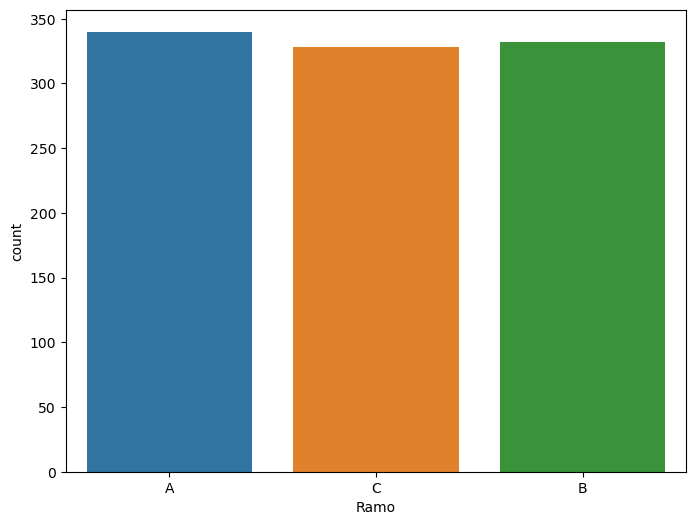

In [67]:
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.countplot(x=df1['ramo'])
plt.xlabel('Ramo')
plt.show()

In [68]:
#Agrupando a cidade
group_cidade = df1.groupby(['cidade']).size()
group_cidade

cidade
Mandalay     332
Naypyitaw    328
Yangon       340
dtype: int64

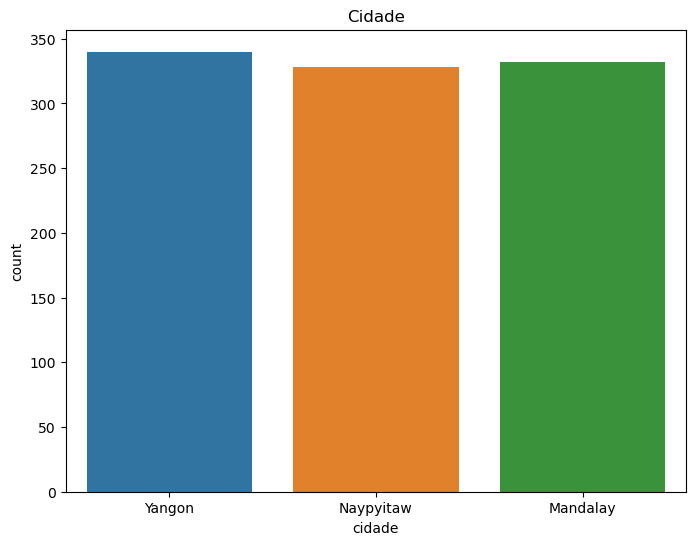

In [69]:
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.countplot(x=df1['cidade'])
plt.title('Cidade')
plt.show()

In [70]:
df[['cidade', 'ramo']].groupby(['cidade']).count()

,ramo
cidade,
Mandalay,332
Naypyitaw,328
Yangon,340


In [71]:
sexo = {'Male': 0, 'Female': 1}
df1['sexo'] = df1['sexo'].map(sexo)

In [72]:
df1.head()

,id_cliente,ramo,cidade,tipo_cliente,sexo,linha_produto,preco_unit,quantidade,taxa_5_perc,total,data_compra,hora_compra,tipo_pagamento,preco_custo,perc_margem_bruta,receita_bruta,exp_compra
0,750-67-8428,A,Yangon,Member,1,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,1,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,0,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,0,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,0,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [73]:
group_sexo = df1.groupby(['sexo']).size()
group_sexo

sexo
0    499
1    501
dtype: int64

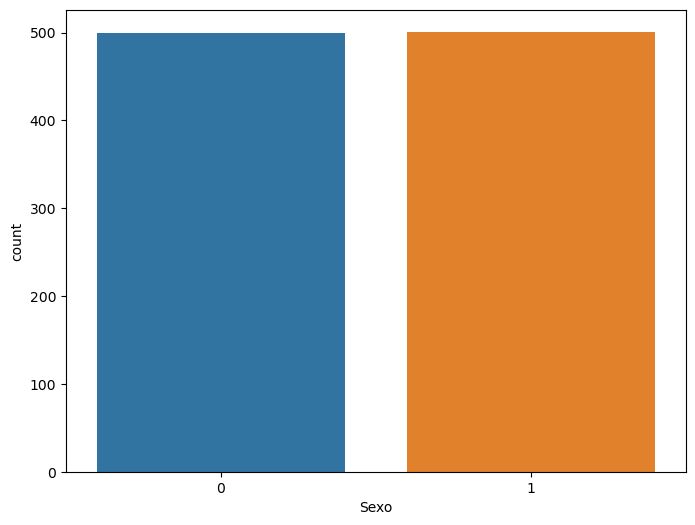

In [74]:
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.countplot(x=df1['sexo'])
plt.xlabel('Sexo')
plt.show()

In [75]:
#Quem comprou mais
df1[['total', 'sexo']].groupby(['sexo']).sum()

,total
sexo,
0,155083.824
1,167882.925


In [76]:
#Média de compra
df1[['total', 'sexo']].groupby(['sexo']).mean()

,total
sexo,
0,310.789226
1,335.095659


### Ordinais - dependem da ordem
tipo_cliente, linha_produto, tipo_pagamento

In [26]:
#agrupando tipo-cliente
group_tipo_cliente = df1.groupby(['tipo_cliente']).size()
group_tipo_cliente

tipo_cliente
Member    501
Normal    499
dtype: int64

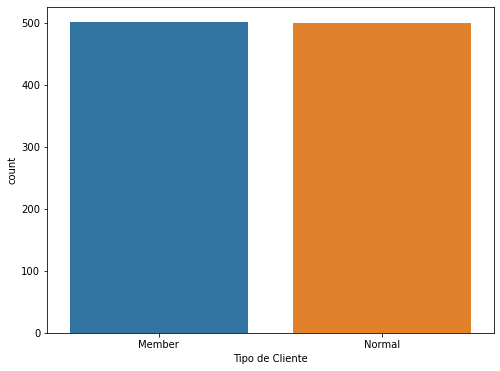

In [27]:
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.countplot(x=df1['tipo_cliente'])
plt.xlabel('Tipo de Cliente')
plt.show()

In [28]:
#Agrupando linha de produto
group_linha_produto = df1.groupby(['linha_produto']).size()
group_linha_produto

linha_produto
Electronic accessories    170
Fashion accessories       178
Food and beverages        174
Health and beauty         152
Home and lifestyle        160
Sports and travel         166
dtype: int64

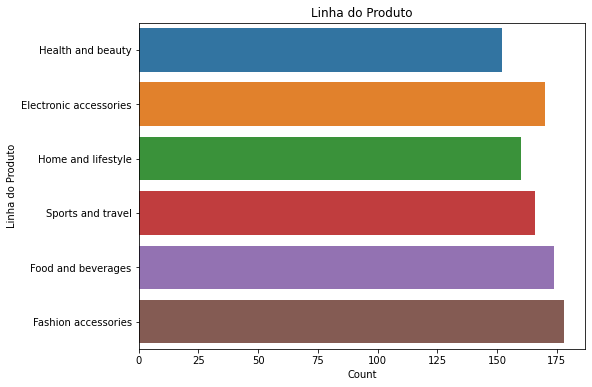

In [29]:
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.countplot(data=df1, y="linha_produto")
plt.title('Linha do Produto')
plt.xlabel('Count')
plt.ylabel('Linha do Produto')
plt.show()

In [30]:
#Agrupando o tipo de pagamento
group_tipo_pagamento = df1.groupby('tipo_pagamento').size()
group_tipo_pagamento

tipo_pagamento
Cash           344
Credit card    311
Ewallet        345
dtype: int64

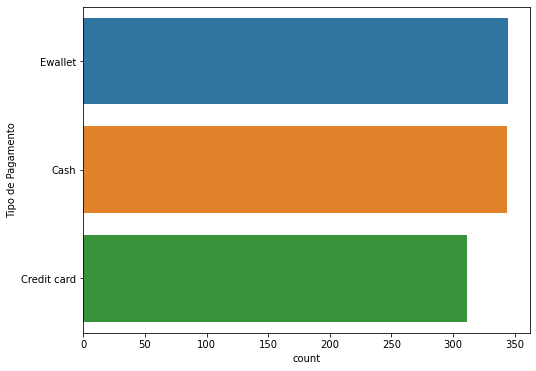

In [31]:
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.countplot(data = df1, y = 'tipo_pagamento')
plt.ylabel('Tipo de Pagamento')
plt.show()

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_cliente         1000 non-null   object 
 1   ramo               1000 non-null   object 
 2   cidade             1000 non-null   object 
 3   tipo_cliente       1000 non-null   object 
 4   sexo               1000 non-null   object 
 5   linha_produto      1000 non-null   object 
 6   preco_unit         1000 non-null   float64
 7   quantidade         1000 non-null   int64  
 8   taxa_5_perc        1000 non-null   float64
 9   total              1000 non-null   float64
 10  data_compra        1000 non-null   object 
 11  hora_compra        1000 non-null   object 
 12  tipo_pagamento     1000 non-null   object 
 13  preco_custo        1000 non-null   float64
 14  perc_margem_bruta  1000 non-null   float64
 15  receita_bruta      1000 non-null   float64
 16  exp_compra         1000 n

## Numéricas - contínuos, campos com vírgula
preco_unit, taxa_5_perc,total,preco_custo,perc_margem_bruta ,receita_bruta,exp_compra  

In [33]:
#preco_unit
df[['preco_unit']].describe()

,preco_unit
count,1000.000000
mean,55.672130
std,26.494628
min,10.080000
25%,32.875000
50%,55.230000
75%,77.935000
max,99.960000


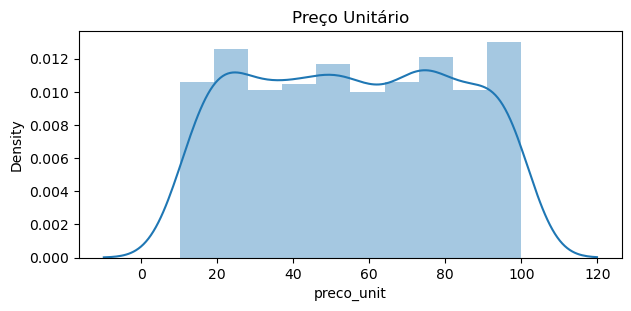

In [34]:
#Histograma
plt.figure(figsize=(7,3),dpi=100)
sns.distplot(df['preco_unit']).set_title('Preço Unitário')
plt.show()

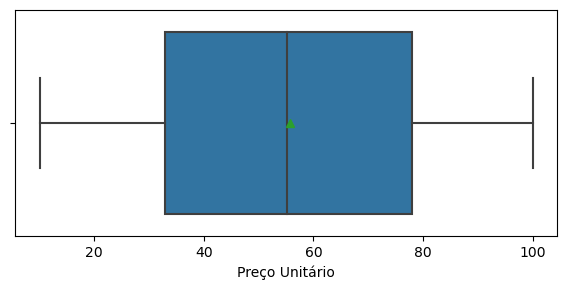

In [35]:
#Boxplot
plt.figure(figsize=(7,3),dpi=100)
ax = sns.boxplot(df['preco_unit'],showmeans=True)
plt.xlabel('Preço Unitário')
plt.show()

## Discretas -inteiros
quantidade


In [36]:
# Quantidade
df[['linha_produto', 'quantidade']].groupby(['linha_produto']).sum()

,quantidade
linha_produto,
Electronic accessories,971
Fashion accessories,902
Food and beverages,952
Health and beauty,854
Home and lifestyle,911
Sports and travel,920


In [37]:
df[['quantidade']].describe()

,quantidade
count,1000.000000
mean,5.510000
std,2.923431
min,1.000000
25%,3.000000
50%,5.000000
75%,8.000000
max,10.000000


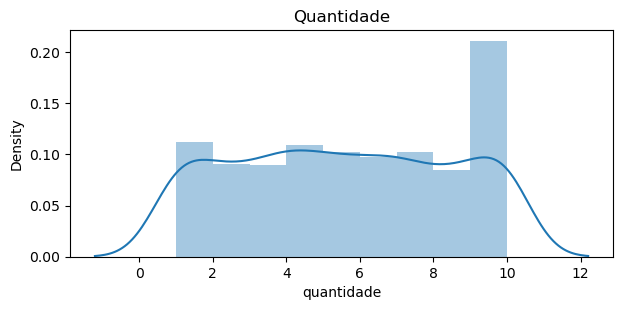

In [38]:
plt.figure(figsize=(7,3),dpi=100)
sns.distplot(df['quantidade']).set_title('Quantidade')
plt.show()

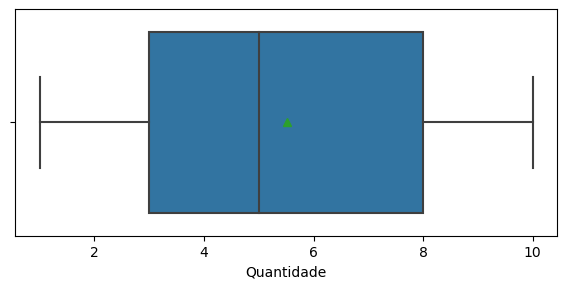

In [39]:
#Boxplot
plt.figure(figsize=(7,3),dpi=100)
ax = sns.boxplot(df['quantidade'],showmeans=True)
plt.xlabel('Quantidade')
plt.show()

### Variáveis data e hora
data_compra, hora_compra

In [40]:
df1.head()

,id_cliente,ramo,cidade,tipo_cliente,sexo,linha_produto,preco_unit,quantidade,taxa_5_perc,total,data_compra,hora_compra,tipo_pagamento,preco_custo,perc_margem_bruta,receita_bruta,exp_compra
0,750-67-8428,A,Yangon,Member,1,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,1,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,0,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,0,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,0,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [41]:
#Converter texto para data. Contudo a data não usarei no modelo
#Vou criar um data frame só para faze análise de série temporal
dfSerie = df1.loc[:,['data_compra','total']]

In [42]:
dfSerie.dtypes

data_compra     object
total          float64
dtype: object

In [43]:
dfSerie.shape

(1000, 2)

In [44]:
#Converter a data
dfSerie['data_compra'] =  pd.to_datetime(dfSerie['data_compra'],format='%m/%d/%Y')

In [45]:
dfSerie.head()

,data_compra,total
0,2019-01-05,548.9715
1,2019-03-08,80.2200
2,2019-03-03,340.5255
3,2019-01-27,489.0480
4,2019-02-08,634.3785


In [46]:
dfSerie.dtypes

data_compra    datetime64[ns]
total                 float64
dtype: object

In [47]:
#Agrupar data por business day frequency
group_business = dfSerie.groupby(pd.Grouper(key='data_compra', freq='B')).sum()
group_business = group_business.reset_index() 

In [48]:
group_business

,data_compra,total
0,2019-01-01,4745.1810
1,2019-01-02,1945.5030
2,2019-01-03,2078.1285
3,2019-01-04,8774.5770
4,2019-01-07,2834.2440
...,...,...
59,2019-03-25,2272.9665
60,2019-03-26,1962.5130
61,2019-03-27,2902.8195
62,2019-03-28,2229.4020


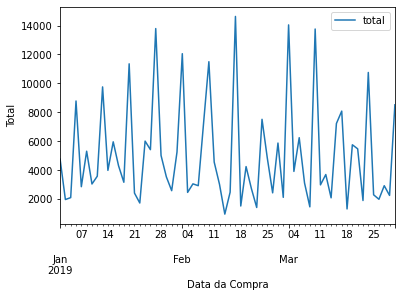

In [49]:
#Gráfico de Linhas
group_business.plot('data_compra','total')
plt.xlabel('Data da Compra')
plt.ylabel('Total')
plt.show()

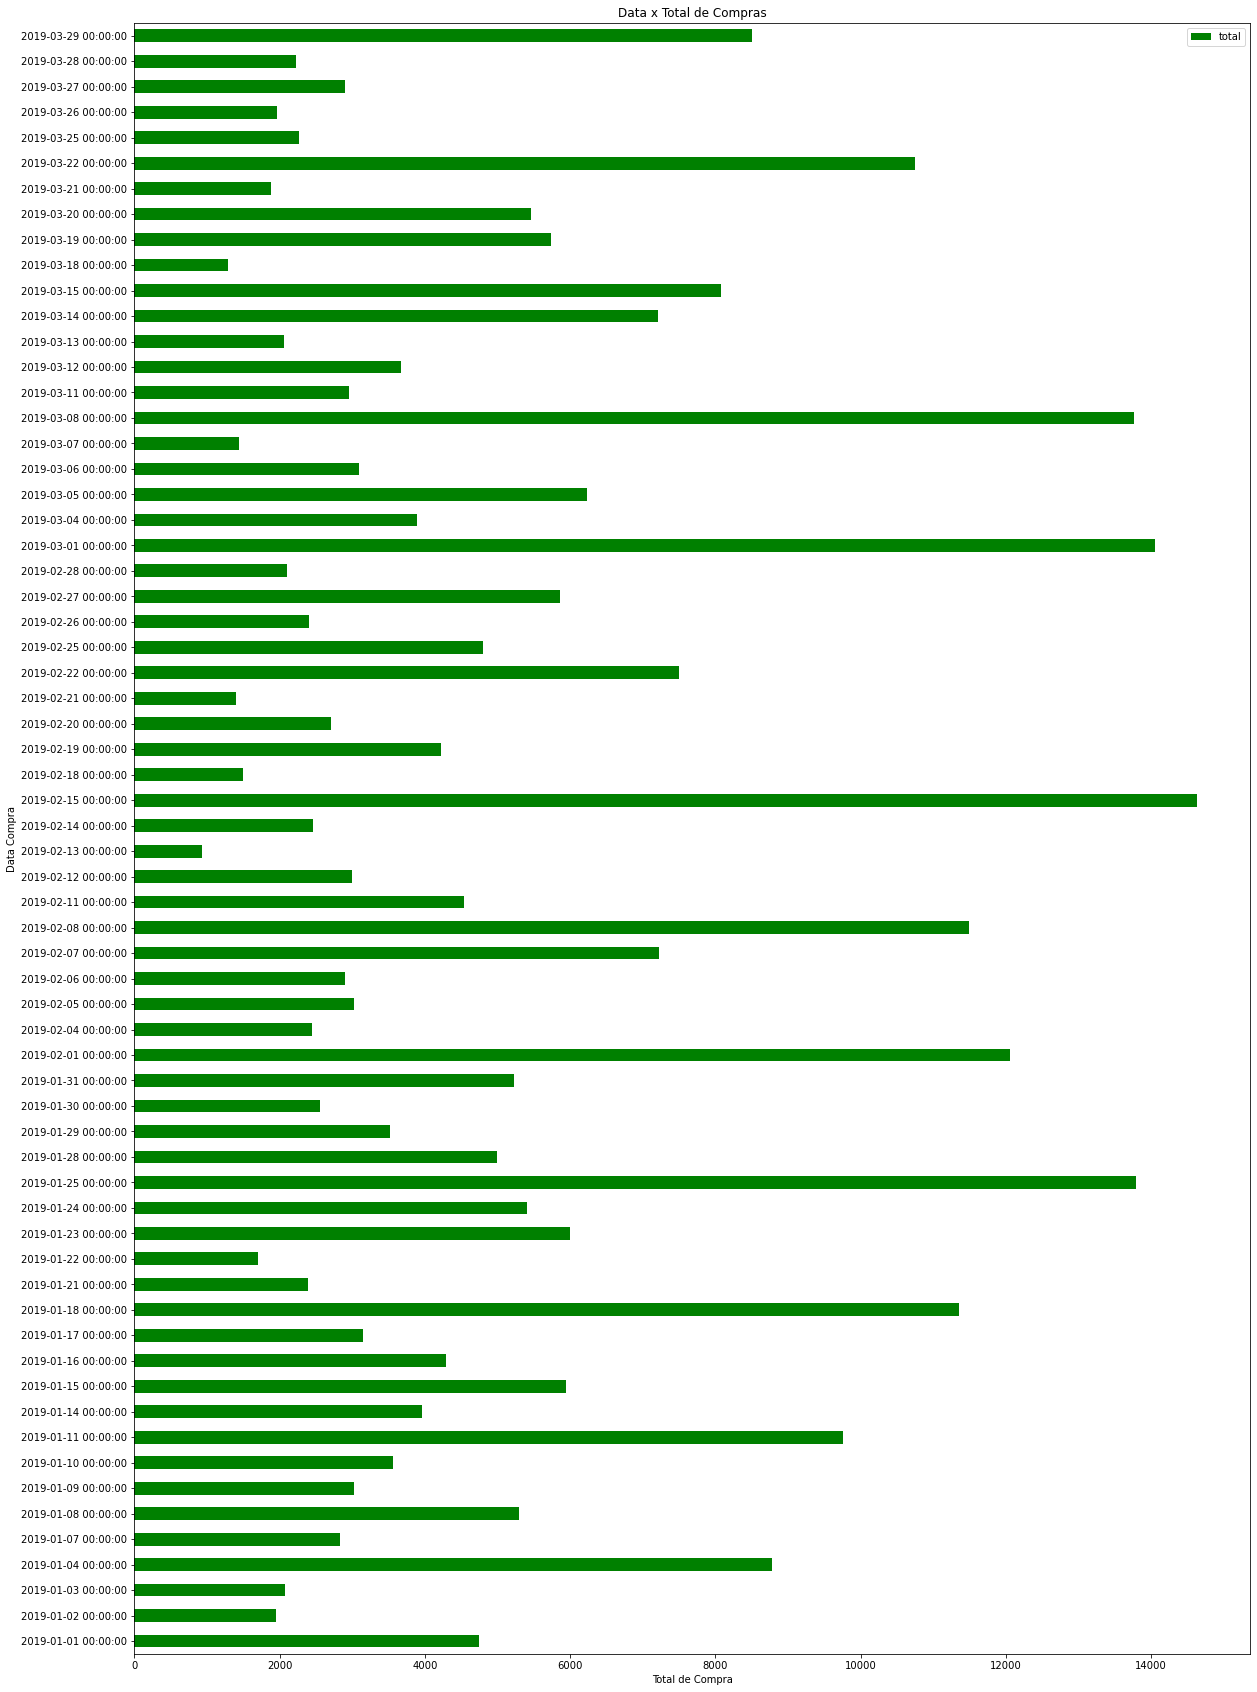

In [50]:
ax = group_business.plot.barh(x='data_compra', y='total',
             title='Data x Total de Compras', figsize=(20,30),color='green')
plt.xlabel('Total de Compra')
plt.ylabel('Data Compra')
plt.show()

In [51]:
#Agrupar data por mes
group_mes = dfSerie.groupby(pd.Grouper(key='data_compra', freq='M')).sum()
group_mes = group_mes.reset_index()
group_mes['data_compra'] = group_mes['data_compra'].dt.strftime('%d/%m/%Y')
display(group_mes)

,data_compra,total
0,31/01/2019,116291.868
1,28/02/2019,97219.374
2,31/03/2019,109455.507


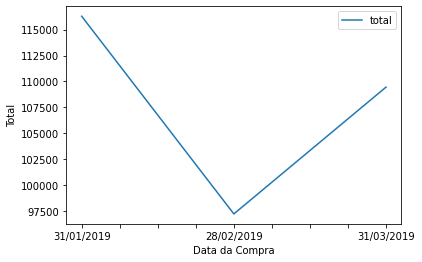

In [52]:
#Gráfico de Linhas
group_mes.plot('data_compra','total')
plt.xlabel('Data da Compra')
plt.ylabel('Total')
plt.show()

In [53]:
# Vamos calculadora a diferente 
group_mes['perc_dif'] = round((group_mes[~group_mes['total'].isnull()]['total'].diff() / 
                         group_mes['total']) * 100,2)
group_mes

,data_compra,total,perc_dif
0,31/01/2019,116291.868,NaN
1,28/02/2019,97219.374,-19.62
2,31/03/2019,109455.507,11.18


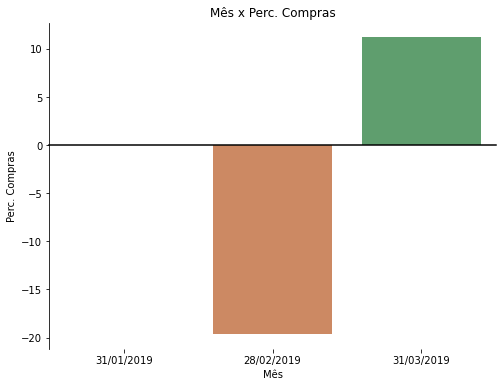

In [54]:
#change_format = group_mes['data_compra'].dt.strftime('%d/%m/%Y')
x = group_mes['data_compra']
y = group_mes['perc_dif']
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.barplot(x=x, y=y, palette="deep")
ax.axhline(0, color="k", clip_on=False)
sns.despine(bottom=True)
plt.title('Mês x Perc. Compras')
plt.xlabel('Mês')
plt.ylabel('Perc. Compras')
plt.show()

In [55]:
#Estou conhecendo os dados
df_frequencia = df1.loc[:,['data_compra','linha_produto','quantidade']]
df_frequencia

,data_compra,linha_produto,quantidade
0,1/5/2019,Health and beauty,7
1,3/8/2019,Electronic accessories,5
2,3/3/2019,Home and lifestyle,7
3,1/27/2019,Health and beauty,8
4,2/8/2019,Sports and travel,7
...,...,...,...
995,1/29/2019,Health and beauty,1
996,3/2/2019,Home and lifestyle,10
997,2/9/2019,Food and beverages,1
998,2/22/2019,Home and lifestyle,1


In [56]:
#Formatei a data padrão americano
df_frequencia['data_compra'] =  pd.to_datetime(df_frequencia['data_compra'],format='%m/%d/%Y')
df_frequencia

,data_compra,linha_produto,quantidade
0,2019-01-05,Health and beauty,7
1,2019-03-08,Electronic accessories,5
2,2019-03-03,Home and lifestyle,7
3,2019-01-27,Health and beauty,8
4,2019-02-08,Sports and travel,7
...,...,...,...
995,2019-01-29,Health and beauty,1
996,2019-03-02,Home and lifestyle,10
997,2019-02-09,Food and beverages,1
998,2019-02-22,Home and lifestyle,1


In [57]:
#vamos fazer uma copia
df_frequencia_data = df_frequencia.copy()

###  Agrupando por ano e mês 

In [58]:
#criando o campo ano e mes no datagrema
df_frequencia['mes'] = df_frequencia.data_compra.dt.month
df_frequencia['ano'] = df_frequencia.data_compra.dt.year
df_frequencia.head()

,data_compra,linha_produto,quantidade,mes,ano
0,2019-01-05,Health and beauty,7,1,2019
1,2019-03-08,Electronic accessories,5,3,2019
2,2019-03-03,Home and lifestyle,7,3,2019
3,2019-01-27,Health and beauty,8,1,2019
4,2019-02-08,Sports and travel,7,2,2019


In [59]:
#remover a data_compra
df_frequencia = df_frequencia.drop(columns=['data_compra'])
df_frequencia.head()

,linha_produto,quantidade,mes,ano
0,Health and beauty,7,1,2019
1,Electronic accessories,5,3,2019
2,Home and lifestyle,7,3,2019
3,Health and beauty,8,1,2019
4,Sports and travel,7,2,2019


In [60]:
#Vamos Agrupar
df_frequencia.groupby(['ano','mes','linha_produto']).count()

quantidade
ano  mes linha_produto                     
2019 1   Electronic accessories          54
         Fashion accessories             64
         Food and beverages              56
         Health and beauty               49
         Home and lifestyle              59
         Sports and travel               70
     2   Electronic accessories          54
         Fashion accessories             60
         Food and beverages              62
         Health and beauty               46
         Home and lifestyle              38
         Sports and travel               43
     3   Electronic accessories          62
         Fashion accessories             54
         Food and beverages              56
         Health and beauty               57
         Home and lifestyle              63
         Sports and travel               53

In [61]:
df_frequencia.groupby(['mes','linha_produto']).count()

quantidade  ano
mes linha_produto                          
1   Electronic accessories          54   54
    Fashion accessories             64   64
    Food and beverages              56   56
    Health and beauty               49   49
    Home and lifestyle              59   59
    Sports and travel               70   70
2   Electronic accessories          54   54
    Fashion accessories             60   60
    Food and beverages              62   62
    Health and beauty               46   46
    Home and lifestyle              38   38
    Sports and travel               43   43
3   Electronic accessories          62   62
    Fashion accessories             54   54
    Food and beverages              56   56
    Health and beauty               57   57
    Home and lifestyle              63   63
    Sports and travel               53   53

In [62]:
#Vamos tirar a prova
df_prod = df1.loc[:,['linha_produto','quantidade']]
df_prod
pd.crosstab(df_prod.linha_produto,df_prod.quantidade)

quantidade,1,2,3,4,5,6,7,8,9,10
linha_produto,,,,,,,,,,
Electronic accessories,20,8,16,19,17,19,16,17,16,22
Fashion accessories,30,22,14,21,15,8,21,12,14,21
Food and beverages,15,16,23,18,21,17,12,15,17,20
Health and beauty,15,13,13,15,18,14,19,15,13,17
Home and lifestyle,13,14,13,22,13,21,12,17,18,17
Sports and travel,19,18,11,14,18,19,22,9,14,22


In [63]:
#Converter texto para data. Contudo a data não usarei no modelo
#Vou criar um data frame só para faze análise de série temporal
df_preco_unit = df1.loc[:,['data_compra','preco_unit']]
df_preco_custo = df1.loc[:,['data_compra','preco_custo']]
df_perc_margem_bruta = df1.loc[:,['data_compra','perc_margem_bruta']]

In [64]:
display(df_preco_unit)

,data_compra,preco_unit
0,1/5/2019,74.69
1,3/8/2019,15.28
2,3/3/2019,46.33
3,1/27/2019,58.22
4,2/8/2019,86.31
...,...,...
995,1/29/2019,40.35
996,3/2/2019,97.38
997,2/9/2019,31.84
998,2/22/2019,65.82


In [65]:
display(df_preco_custo)

,data_compra,preco_custo
0,1/5/2019,522.83
1,3/8/2019,76.40
2,3/3/2019,324.31
3,1/27/2019,465.76
4,2/8/2019,604.17
...,...,...
995,1/29/2019,40.35
996,3/2/2019,973.80
997,2/9/2019,31.84
998,2/22/2019,65.82


In [66]:
df_preco_unit['data_compra'] =  pd.to_datetime(df_preco_unit['data_compra'],format='%m/%d/%Y')
df_preco_custo['data_compra'] =  pd.to_datetime(df_preco_custo['data_compra'],format='%m/%d/%Y')
df_perc_margem_bruta['data_compra'] =  pd.to_datetime(df_perc_margem_bruta['data_compra'],format='%m/%d/%Y')

In [67]:
#Agrupar data por mes
group_mes_c = df_preco_unit.groupby(pd.Grouper(key='data_compra', freq='M')).sum()
group_mes_c = group_mes_c.reset_index()
group_mes_c['data_compra'] = group_mes_c['data_compra'].dt.strftime('%d/%m/%Y')
display(group_mes_c)

,data_compra,preco_unit
0,31/01/2019,19753.89
1,28/02/2019,17159.52
2,31/03/2019,18758.72


In [68]:
# Vamos calculadora a diferente 
group_mes_c['perc_dif'] = round((group_mes_c[~group_mes_c['preco_unit'].isnull()]['preco_unit'].diff() / 
                         group_mes_c['preco_unit']) * 100,2)
group_mes_c

,data_compra,preco_unit,perc_dif
0,31/01/2019,19753.89,NaN
1,28/02/2019,17159.52,-15.12
2,31/03/2019,18758.72,8.53


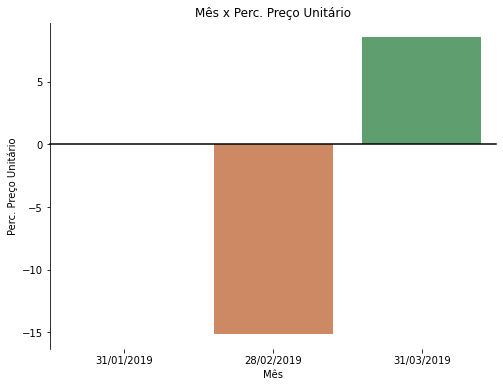

In [69]:
x = group_mes_c['data_compra']
y = group_mes_c['perc_dif']
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.barplot(x=x, y=y, palette="deep")
ax.axhline(0, color="k", clip_on=False)
sns.despine(bottom=True)
plt.title('Mês x Perc. Preço Unitário')
plt.xlabel('Mês')
plt.ylabel('Perc. Preço Unitário')
plt.show()

In [70]:
group_mes_a = df_preco_custo.groupby(pd.Grouper(key='data_compra', freq='M')).sum()
group_mes_a = group_mes_a.reset_index()
group_mes_a['data_compra'] = group_mes_a['data_compra'].dt.strftime('%d/%m/%Y')
display(group_mes_a)

,data_compra,preco_custo
0,31/01/2019,110754.16
1,28/02/2019,92589.88
2,31/03/2019,104243.34


In [71]:
# Vamos calculadora a diferente 
group_mes_a['perc_dif'] = round((group_mes_a[~group_mes_a['preco_custo'].isnull()]['preco_custo'].diff() / 
                         group_mes_a['preco_custo']) * 100,2)
group_mes_a

,data_compra,preco_custo,perc_dif
0,31/01/2019,110754.16,NaN
1,28/02/2019,92589.88,-19.62
2,31/03/2019,104243.34,11.18


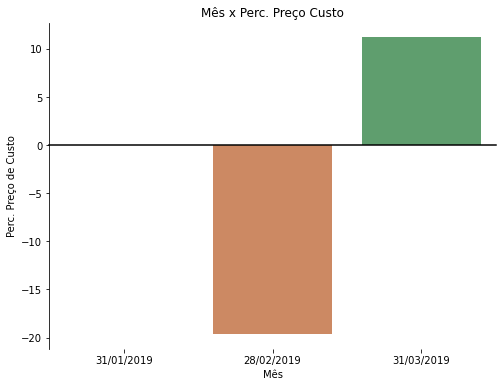

In [72]:
x = group_mes_a['data_compra']
y = group_mes_a['perc_dif']
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.barplot(x=x, y=y, palette="deep")
ax.axhline(0, color="k", clip_on=False)
sns.despine(bottom=True)
plt.title('Mês x Perc. Preço Custo')
plt.xlabel('Mês')
plt.ylabel('Perc. Preço de Custo')
plt.show()

In [73]:
group_mes_m = df_perc_margem_bruta.groupby(pd.Grouper(key='data_compra', freq='M')).sum()
group_mes_m = group_mes_m.reset_index()
group_mes_m['data_compra'] = group_mes_m['data_compra'].dt.strftime('%d/%m/%Y')
display(group_mes_m)

,data_compra,perc_margem_bruta
0,31/01/2019,1676.190476
1,28/02/2019,1442.857143
2,31/03/2019,1642.857143


In [74]:
# Vamos calculadora a diferente 
group_mes_m['perc_dif'] = round((group_mes_m[~group_mes_m['perc_margem_bruta'].isnull()]['perc_margem_bruta'].diff() / 
                         group_mes_m['perc_margem_bruta']) * 100,2)
group_mes_m

,data_compra,perc_margem_bruta,perc_dif
0,31/01/2019,1676.190476,NaN
1,28/02/2019,1442.857143,-16.17
2,31/03/2019,1642.857143,12.17


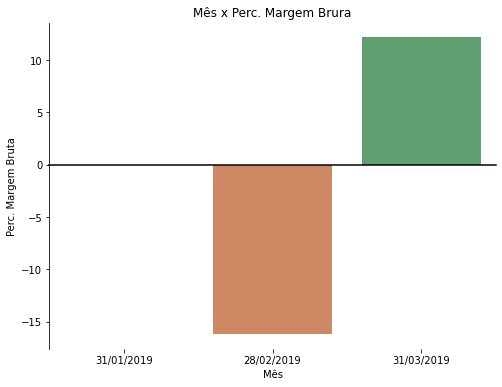

In [75]:
x = group_mes_m['data_compra']
y = group_mes_m['perc_dif']
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.barplot(x=x, y=y, palette="deep")
ax.axhline(0, color="k", clip_on=False)
sns.despine(bottom=True)
plt.title('Mês x Perc. Margem Brura')
plt.xlabel('Mês')
plt.ylabel('Perc. Margem Bruta')
plt.show()

In [76]:
#Qual tipo de cliente teve mais queda e
#data_compra	 ramo	cidade	tipo_cliente	total	
df_ramo = df1.loc[:,['data_compra','ramo','total']]
df_tudo = df1.loc[:,['data_compra','ramo','cidade','tipo_cliente','total']] 

In [77]:
df_ramo['data_compra'] = pd.to_datetime(df_ramo['data_compra'],format='%m/%d/%Y')
#criando o campo ano e mes no datagrema
df_ramo['mes'] = df_ramo.data_compra.dt.month
df_ramo['ano'] = df_ramo.data_compra.dt.year
#remover a data_compra
df_ramo = df_ramo.drop(columns=['data_compra'])

In [78]:
df_tudo['data_compra'] = pd.to_datetime(df_tudo['data_compra'],format='%m/%d/%Y')
#criando o campo ano e mes no datagrema
df_tudo['mes'] = df_tudo.data_compra.dt.month
df_tudo['ano'] = df_tudo.data_compra.dt.year
#Converter para String para usar o sidetable
df_tudo['mes'] = df_ramo['mes'].map(str)
df_tudo['ano'] = df_ramo['ano'].map(str)
#remover a data_compra
df_tudo = df_tudo.drop(columns=['data_compra'])

In [79]:
#Vamos Agrupar
df_tudo.groupby(['ano','mes','cidade','tipo_cliente']).agg({'total': ['sum']}).stb.subtotal()

total
                                                                                         sum
ano         mes             cidade              tipo_cliente                                
2019        1               Mandalay            Member                            18568.7250
                                                Normal                            18607.3335
                                                2019 | 1 | Mandalay - subtotal    37176.0585
                            Naypyitaw           Member                            19148.0520
                                                Normal                            21286.6290
                                                2019 | 1 | Naypyitaw - subtotal   40434.6810
                            Yangon              Member                            20198.0520
                                                Normal                            18483.0765
                                                2019 | 1 | Yangon - subtotal      38681.1285
                            2019 | 1 - subtotal                                  116291.8680
            2               Mandalay            Member                            17156.9370
                                                Normal                            17267.3340
                                                2019 | 2 | Mandalay - subtotal    34424.2710
                            Naypyitaw           Member                            17165.7045
                                                Normal                            15769.2780
                                                2019 | 2 | Naypyitaw - subtotal   32934.9825
                            Yangon              Member                            15973.4085
                                                Normal                            13886.7120
                                                2019 | 2 | Yangon - subtotal      29860.1205
                            2019 | 2 - subtotal                                   97219.3740
            3               Mandalay            Member                            17979.0240
                                                Normal                            16618.3185
                                                2019 | 3 | Mandalay - subtotal    34597.3425
                            Naypyitaw           Member                            20567.5260
                                                Normal                            16631.5170
                                                2019 | 3 | Naypyitaw - subtotal   37199.0430
                            Yangon              Member                            17466.0150
                                                Normal                            20193.1065
                                                2019 | 3 | Yangon - subtotal      37659.1215
                            2019 | 3 - subtotal                                  109455.5070
            2019 - subtotal                                                      322966.7490
grand_total                                                                      322966.7490

In [14]:
df1.head()

,id_cliente,ramo,cidade,tipo_cliente,sexo,linha_produto,preco_unit,quantidade,taxa_5_perc,total,data_compra,hora_compra,tipo_pagamento,preco_custo,perc_margem_bruta,receita_bruta,exp_compra
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [51]:
#Verifica duplicados
df1[df1.duplicated(keep=False)]

,id_cliente,tipo_cliente,linha_produto,preco_unit,quantidade,taxa_5_perc,total,data_compra,hora_compra,tipo_pagamento,...,receita_bruta,exp_compra,ramo_A,ramo_B,ramo_C,cidade_Mandalay,cidade_Naypyitaw,cidade_Yangon,sexo_masc,sexo_fem


In [15]:
# Verificando Valores Únicos
df1.nunique()

id_cliente           1000
ramo                    3
cidade                  3
tipo_cliente            2
sexo                    2
linha_produto           6
preco_unit            943
quantidade             10
taxa_5_perc           990
total                 990
data_compra            89
hora_compra           506
tipo_pagamento          3
preco_custo           990
perc_margem_bruta       1
receita_bruta         990
exp_compra             61
dtype: int64

### Correlações

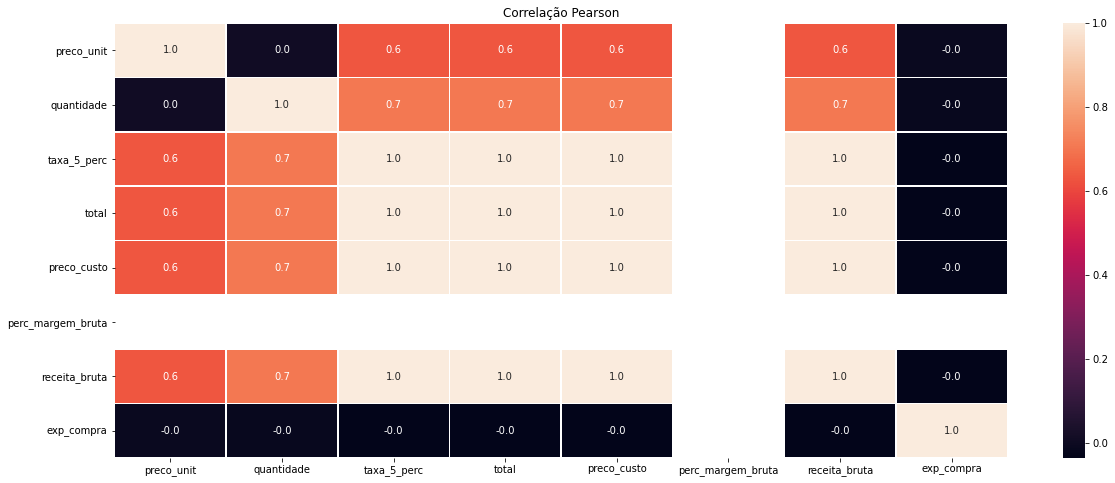

In [16]:
# Correlação Pearson para regressão 
fig, ax = plt.subplots(figsize=(20,8))
ax = sns.heatmap(df1.corr(method='pearson'), annot = True, fmt=".1f", linewidths=.6)
ax.set_title('Correlação Pearson')
plt.show()

### Campos com correlação  moderada a ótima com total
* total -> quantidade : boa
* total -> taxa_5_perc : ótima
* total -> preco_custo : ótima
* total -> receita_bruta : ótima
* total -> preco_unit : moderada

### Campos com multicorrelação de moderada a ótima
* taxa_5_perc -> preço de custo : ótima
* quantidade -> taxa_5_perc: boa
* preco_custo -> preco_unit: moderada 

### Vou remover taxa_5_perc e preco_unit


### Note: as variáveis selecionadas geram o valor total, principalmente a quantidade e preco_custo. Provavelmente o modelo de regressão deve chegar a  100% ou estará muito próximo. Portanto, iremos selecionar um outro target a "quantidade", pois aumentando a quantidade de produtos vendidos, também aumento o valor total. Portanto, vamos fazer um encoder,  transformar as categóricas em números e selecionar outras que possuem correlações de regular a ótimo com quantidade

### Analisar as correlações com o scatter plot

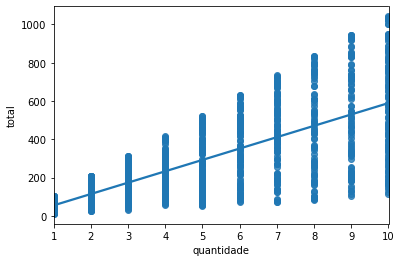

In [158]:
ax = sns.regplot(x = "quantidade",y = "total",ci = None,data = df) 

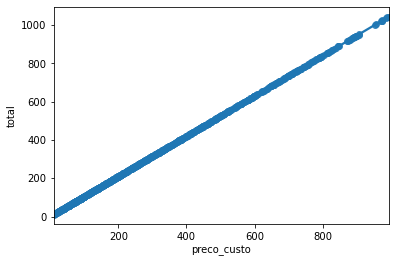

In [85]:
ax = sns.regplot(x = "preco_custo",y = "total",ci = None,data = df) 

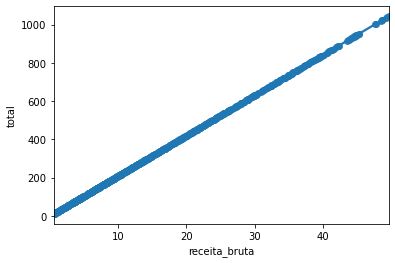

In [88]:
#ax = sns.scatterplot(x='receita_bruta', y='total', data=df)
ax = sns.regplot(x = "receita_bruta",y = "total",ci = None,data = df) 

# 3° Pré-processamento dos Dados - 1

In [18]:
X = df[['quantidade', 'preco_custo','receita_bruta']]
X

,quantidade,preco_custo,receita_bruta
0,7,522.83,26.1415
1,5,76.40,3.8200
2,7,324.31,16.2155
3,8,465.76,23.2880
4,7,604.17,30.2085
...,...,...,...
995,1,40.35,2.0175
996,10,973.80,48.6900
997,1,31.84,1.5920
998,1,65.82,3.2910


In [19]:
y = df[['total']]
y

,total
0,548.9715
1,80.2200
2,340.5255
3,489.0480
4,634.3785
...,...
995,42.3675
996,1022.4900
997,33.4320
998,69.1110


In [20]:
X.shape, y.shape

((1000, 3), (1000, 1))

# 4° Construção da Máquina Preditiva

In [25]:
from sklearn.model_selection import train_test_split
X_treino, X_teste, y_treino, y_teste = train_test_split(X,y,test_size=0.3,random_state=42) 

In [26]:
X_treino.shape, X_teste.shape, y_treino.shape, y_teste.shape

((700, 3), (300, 3), (700, 1), (300, 1))

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
lr = LinearRegression() 
lr.fit(X_treino,y_treino) 

LinearRegression()

# 5° Avaliação da Máquina Preditiva

In [29]:
lr.score(X_teste, y_teste)

1.0

In [36]:
#Fazendo as previsões
y_pred = lr.predict(X_teste)

In [37]:
#Criar um dataframe vazia para receber as predições
df_results = pd.DataFrame(y_teste.values,columns=['total_real'])

In [38]:
df_results

,total_real
0,523.9710
1,616.9800
2,408.7335
3,135.3555
4,45.9270
...,...
295,22.6590
296,270.0180
297,353.1675
298,772.3800


In [39]:
df_results['total_precito'] = y_pred

In [40]:
df_results.head(20)

,total_real,total_precito
0,523.9710,523.9710
1,616.9800,616.9800
2,408.7335,408.7335
3,135.3555,135.3555
4,45.9270,45.9270
5,618.9750,618.9750
6,127.8270,127.8270
7,731.6925,731.6925
8,450.1035,450.1035
9,138.1275,138.1275


# 3° Pré-processamento dos Dados - 2

### Realizar os encoders e fazer uma nova correlação com total

In [15]:
df1.head()

,id_cliente,ramo,cidade,tipo_cliente,sexo,linha_produto,preco_unit,quantidade,taxa_5_perc,total,data_compra,hora_compra,tipo_pagamento,preco_custo,perc_margem_bruta,receita_bruta,exp_compra
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [16]:
#Dummy de ramo,cidade,sexo
#sexo = {'Male': 0, 'Female': 1}
df1 = pd.get_dummies(df1, columns=['ramo','cidade','sexo'])

In [17]:
df1.head()

,id_cliente,tipo_cliente,linha_produto,preco_unit,quantidade,taxa_5_perc,total,data_compra,hora_compra,tipo_pagamento,...,receita_bruta,exp_compra,ramo_A,ramo_B,ramo_C,cidade_Mandalay,cidade_Naypyitaw,cidade_Yangon,sexo_Female,sexo_Male
0,750-67-8428,Member,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,...,26.1415,9.1,1,0,0,0,0,1,1,0
1,226-31-3081,Normal,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,...,3.8200,9.6,0,0,1,0,1,0,1,0
2,631-41-3108,Normal,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,...,16.2155,7.4,1,0,0,0,0,1,0,1
3,123-19-1176,Member,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,...,23.2880,8.4,1,0,0,0,0,1,0,1
4,373-73-7910,Normal,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,...,30.2085,5.3,1,0,0,0,0,1,0,1


In [18]:
df1.rename(columns={"sexo_0": "sexo_masc", "sexo_1": "sexo_fem"}, inplace = True)

In [19]:
df1.head()

,id_cliente,tipo_cliente,linha_produto,preco_unit,quantidade,taxa_5_perc,total,data_compra,hora_compra,tipo_pagamento,...,receita_bruta,exp_compra,ramo_A,ramo_B,ramo_C,cidade_Mandalay,cidade_Naypyitaw,cidade_Yangon,sexo_Female,sexo_Male
0,750-67-8428,Member,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,...,26.1415,9.1,1,0,0,0,0,1,1,0
1,226-31-3081,Normal,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,...,3.8200,9.6,0,0,1,0,1,0,1,0
2,631-41-3108,Normal,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,...,16.2155,7.4,1,0,0,0,0,1,0,1
3,123-19-1176,Member,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,...,23.2880,8.4,1,0,0,0,0,1,0,1
4,373-73-7910,Normal,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,...,30.2085,5.3,1,0,0,0,0,1,0,1


In [20]:
#Label encoder tipo_cliente,linha_produto,tipo_pagamento
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df1['tipo_cliente'] = labelencoder.fit_transform(df1['tipo_cliente'])

In [21]:
#Label encoder tipos_cliente,linha_produto,tipo_pagamento
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df1['tipo_cliente'] = labelencoder.fit_transform(df1['tipo_cliente'])
df1['linha_produto'] = labelencoder.fit_transform(df1['linha_produto'])
df1['tipo_pagamento'] = labelencoder.fit_transform(df1['tipo_pagamento'])

In [22]:
df1.head()

,id_cliente,tipo_cliente,linha_produto,preco_unit,quantidade,taxa_5_perc,total,data_compra,hora_compra,tipo_pagamento,...,receita_bruta,exp_compra,ramo_A,ramo_B,ramo_C,cidade_Mandalay,cidade_Naypyitaw,cidade_Yangon,sexo_Female,sexo_Male
0,750-67-8428,0,3,74.69,7,26.1415,548.9715,1/5/2019,13:08,2,...,26.1415,9.1,1,0,0,0,0,1,1,0
1,226-31-3081,1,0,15.28,5,3.8200,80.2200,3/8/2019,10:29,0,...,3.8200,9.6,0,0,1,0,1,0,1,0
2,631-41-3108,1,4,46.33,7,16.2155,340.5255,3/3/2019,13:23,1,...,16.2155,7.4,1,0,0,0,0,1,0,1
3,123-19-1176,0,3,58.22,8,23.2880,489.0480,1/27/2019,20:33,2,...,23.2880,8.4,1,0,0,0,0,1,0,1
4,373-73-7910,1,5,86.31,7,30.2085,634.3785,2/8/2019,10:37,2,...,30.2085,5.3,1,0,0,0,0,1,0,1


In [23]:
#Verifica duplicados
df1[df1.duplicated(keep=False)]

,id_cliente,tipo_cliente,linha_produto,preco_unit,quantidade,taxa_5_perc,total,data_compra,hora_compra,tipo_pagamento,...,receita_bruta,exp_compra,ramo_A,ramo_B,ramo_C,cidade_Mandalay,cidade_Naypyitaw,cidade_Yangon,sexo_Female,sexo_Male


In [24]:
df1.drop(['id_cliente'], axis=1,inplace = True)
df1.drop(['data_compra'], axis=1,inplace = True)
df1.drop(['hora_compra'], axis=1,inplace = True)
df1.head()

,tipo_cliente,linha_produto,preco_unit,quantidade,taxa_5_perc,total,tipo_pagamento,preco_custo,perc_margem_bruta,receita_bruta,exp_compra,ramo_A,ramo_B,ramo_C,cidade_Mandalay,cidade_Naypyitaw,cidade_Yangon,sexo_Female,sexo_Male
0,0,3,74.69,7,26.1415,548.9715,2,522.83,4.761905,26.1415,9.1,1,0,0,0,0,1,1,0
1,1,0,15.28,5,3.8200,80.2200,0,76.40,4.761905,3.8200,9.6,0,0,1,0,1,0,1,0
2,1,4,46.33,7,16.2155,340.5255,1,324.31,4.761905,16.2155,7.4,1,0,0,0,0,1,0,1
3,0,3,58.22,8,23.2880,489.0480,2,465.76,4.761905,23.2880,8.4,1,0,0,0,0,1,0,1
4,1,5,86.31,7,30.2085,634.3785,2,604.17,4.761905,30.2085,5.3,1,0,0,0,0,1,0,1


# Normalização

In [40]:
#Normalizar os dados
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#df1_norm = pd.DataFrame(scaler.fit_transform(df1), columns=df1.columns)
#df1_norm

,tipo_cliente,linha_produto,preco_unit,quantidade,taxa_5_perc,total,tipo_pagamento,preco_custo,perc_margem_bruta,receita_bruta,exp_compra,ramo_A,ramo_B,ramo_C,cidade_Mandalay,cidade_Naypyitaw,cidade_Yangon,sexo_Female,sexo_Male
0,0.0,0.6,0.718847,0.666667,0.521616,0.521616,1.0,0.521616,0.0,0.521616,0.850000,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,1.0,0.0,0.057855,0.444444,0.067387,0.067387,0.0,0.067387,0.0,0.067387,0.933333,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,1.0,0.8,0.403316,0.666667,0.319628,0.319628,0.5,0.319628,0.0,0.319628,0.566667,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.0,0.6,0.535603,0.777778,0.463549,0.463549,1.0,0.463549,0.0,0.463549,0.733333,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,1.0,1.0,0.848131,0.666667,0.604377,0.604377,1.0,0.604377,0.0,0.604377,0.216667,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.0,0.6,0.336782,0.000000,0.030707,0.030707,1.0,0.030707,0.0,0.030707,0.366667,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
996,1.0,0.8,0.971295,1.000000,0.980465,0.980465,1.0,0.980465,0.0,0.980465,0.066667,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
997,0.0,0.4,0.242101,0.000000,0.022049,0.022049,0.0,0.022049,0.0,0.022049,0.616667,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
998,1.0,0.8,0.620160,0.000000,0.056622,0.056622,0.0,0.056622,0.0,0.056622,0.016667,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [154]:
df1.corr()['quantidade']
#df1_norm.corr()['quantidade']

tipo_cliente        -0.016763
linha_produto        0.020256
preco_unit           0.010778
quantidade           1.000000
taxa_5_perc          0.705510
total                0.705510
tipo_pagamento      -0.003921
preco_custo          0.705510
perc_margem_bruta         NaN
receita_bruta        0.705510
exp_compra          -0.015815
ramo_A              -0.010403
ramo_B              -0.006773
ramo_C               0.017291
cidade_Mandalay     -0.006773
cidade_Naypyitaw     0.017291
cidade_Yangon       -0.010403
sexo_Female          0.074258
sexo_Male           -0.074258
Name: quantidade, dtype: float64

In [41]:
#taxa_5_perc,preco_custo,receita_bruta, talvez sexo
X = df1.drop(['quantidade','receita_bruta'], axis=1)
X

,tipo_cliente,linha_produto,preco_unit,taxa_5_perc,total,tipo_pagamento,preco_custo,perc_margem_bruta,exp_compra,ramo_A,ramo_B,ramo_C,cidade_Mandalay,cidade_Naypyitaw,cidade_Yangon,sexo_Female,sexo_Male
0,0,3,74.69,26.1415,548.9715,2,522.83,4.761905,9.1,1,0,0,0,0,1,1,0
1,1,0,15.28,3.8200,80.2200,0,76.40,4.761905,9.6,0,0,1,0,1,0,1,0
2,1,4,46.33,16.2155,340.5255,1,324.31,4.761905,7.4,1,0,0,0,0,1,0,1
3,0,3,58.22,23.2880,489.0480,2,465.76,4.761905,8.4,1,0,0,0,0,1,0,1
4,1,5,86.31,30.2085,634.3785,2,604.17,4.761905,5.3,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,3,40.35,2.0175,42.3675,2,40.35,4.761905,6.2,0,0,1,0,1,0,0,1
996,1,4,97.38,48.6900,1022.4900,2,973.80,4.761905,4.4,0,1,0,1,0,0,1,0
997,0,2,31.84,1.5920,33.4320,0,31.84,4.761905,7.7,1,0,0,0,0,1,0,1
998,1,4,65.82,3.2910,69.1110,0,65.82,4.761905,4.1,1,0,0,0,0,1,0,1


In [42]:
y = df1['quantidade']
y

0       7
1       5
2       7
3       8
4       7
       ..
995     1
996    10
997     1
998     1
999     7
Name: quantidade, Length: 1000, dtype: int64

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X,y,test_size=0.3,random_state=42) 

# Padronização

In [65]:
# Padronização
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X_treino_scaled = sc.fit_transform(X_treino)
#X_teste_scaled = sc.transform(X_teste)

In [70]:
#y_treino_scaled = sc.fit_transform(y_treino)
#y_teste_scaled = sc.transform(y_teste)

In [71]:
X_treino , X_treino, X_teste, y_treino, y_teste

(     taxa_5_perc  preco_custo  receita_bruta
 541       3.7940        75.88         3.7940
 440       4.3600        87.20         4.3600
 482       9.2850       185.70         9.2850
 422      48.6050       972.10        48.6050
 778       6.3125       126.25         6.3125
 ..           ...          ...            ...
 106       8.2140       164.28         8.2140
 270      16.8575       337.15        16.8575
 860       4.3135        86.27         4.3135
 435      44.6580       893.16        44.6580
 102      10.3815       207.63        10.3815
 
 [700 rows x 3 columns],
      taxa_5_perc  preco_custo  receita_bruta
 541       3.7940        75.88         3.7940
 440       4.3600        87.20         4.3600
 482       9.2850       185.70         9.2850
 422      48.6050       972.10        48.6050
 778       6.3125       126.25         6.3125
 ..           ...          ...            ...
 106       8.2140       164.28         8.2140
 270      16.8575       337.15        16.8575
 860   

# 4º Construindo o modelo

In [45]:
# Build and train model
#from sklearn.linear_model import LinearRegression
#from sklearn.tree import DecisionTreeRegressor
#from sklearn.ensemble import RandomForestRegressor 
import xgboost as xgb
#lr = LinearRegression() 
#lr.fit(X_treino,y_treino)
#dtr = DecisionTreeRegressor(random_state=42)
#dtr.fit(X_treino,y_treino)
#rfr = RandomForestRegressor(random_state=42, n_estimators=100)
#rfr.fit(X_treino,y_treino)
xgr = xgb.XGBRegressor(random_state=42) 
xgr.fit(X_treino,y_treino)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, ...)

# 5º Avaliando o modelo 

In [46]:
#Coeficiente de determinação R2
#lr.score(X_teste_scaled, y_teste_scaled)
#lr.score(X_teste, y_teste)
#dtr.score(X_teste, y_teste)
#rfr.score(X_teste, y_teste)
xgr.score(X_teste, y_teste)
#Este é do sklearn.metrics
#from sklearn.metrics import r2_score
#r2_score(y_teste,previsoes)

0.991529021621531

In [31]:
previsoes = xgr.predict(X_teste)
previsoes

array([ 5.9655733 ,  9.727208  ,  6.9203176 ,  3.6073413 ,  2.0431983 ,
        9.755379  ,  1.9535093 ,  7.439374  ,  8.809667  ,  4.9561024 ,
        9.662008  ,  9.2083845 ,  7.0264907 ,  2.9861543 ,  3.0638313 ,
        8.328989  ,  8.007148  ,  5.86652   , 10.00207   ,  3.9495258 ,
        5.6141353 ,  7.736067  ,  1.992352  ,  2.0216086 ,  9.146816  ,
        2.0814626 ,  8.977529  ,  2.0486572 ,  5.1192226 ,  0.9951441 ,
        1.0121868 ,  8.145678  ,  0.98880965,  7.924489  ,  6.83917   ,
        3.919455  ,  9.722387  ,  3.4646304 ,  3.9767241 ,  6.434897  ,
        3.9573529 ,  9.738904  ,  5.4170375 ,  2.1159782 ,  1.0167985 ,
        3.999086  ,  5.7075934 ,  0.99168146,  8.248624  ,  6.1008244 ,
        5.381803  ,  8.0066805 ,  4.251535  ,  4.009315  ,  4.7440047 ,
        5.0138197 ,  5.193683  ,  4.426475  ,  7.3060436 ,  3.908002  ,
        4.5700235 ,  1.9724677 ,  3.9712522 ,  9.073543  ,  7.1625195 ,
        9.582907  ,  6.021141  ,  7.922003  ,  9.679177  ,  6.22

In [32]:
#Quando menor o RMSE melhor. Se der 0 é porque acertou tudo. Quanto mais perto de 0 melhor
from sklearn.metrics import mean_squared_error
import numpy as np
rmse = (np.sqrt(mean_squared_error(y_teste,previsoes)))
rmse

0.26700233722101346

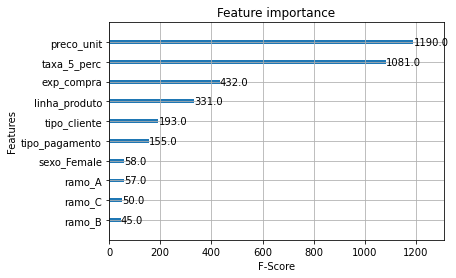

In [47]:
fig, ax = plt.subplots(figsize=(6, 4))
xgb.plot_importance(xgr, ax=ax)
plt.ylabel('Features')
plt.xlabel('F-Score')
plt.show()

In [155]:
#Criar um dataframe vazia para receber as predições
df_results = pd.DataFrame(y_teste.values,columns=['total_real'])
df_results

,total_real
0,6
1,10
2,7
3,3
4,2
...,...
295,1
296,3
297,5
298,10


In [160]:
df_results['total_predito'] = previsoes
df_results.astype(int)

,total_real,total_predito
0,6,5
1,10,9
2,7,6
3,3,3
4,2,2
...,...,...
295,1,1
296,3,3
297,5,4
298,10,10


### Note: Fiz vários testes com diferentes algoritmos. Primeiramente foquei em selecionar as principais features pela correlação, mas não deu certo. Então, resolvi usar modelos com algoritmos ensembled com todos os campos e deu um resultado muito bom. No final exibi as principais features com o XGBoost que foi o melhor algoritmo